In [0]:
import pandas as pd
data=pd.read_csv('/video_data.csv')

In [13]:
data.shape

(5585, 5)

In [14]:
data.category_name.describe()

count           5585
unique            10
top       India News
freq            2103
Name: category_name, dtype: object

In [15]:
data.head(5)

,video_id,category_name,short_description,story_text,title
0,5653616771001,Entertainment News,The 34-year-old actor is not sure if he's goin...,Hack: \tThe 34-year-old actor is not sure if h...,Adam Driver still 'undecided' on seeing 'Star ...
1,5631919940001,Entertainment News,The poster gives us a closer look at the actor...,The latest poster of 2.0 featuring Bollywood s...,"BEWARE: Akshay Kumar's look from 2.0 is out, a..."
2,5767901401001,India News,A massive outrage has erupted over the horrifi...,A massive outrage has erupted over the horrifi...,Kathua-Rape-Murder Case: Protesters demand CBI...
3,5741125480001,India News,"According to forensic report, traces of alcoho...",The mystery surrounding Sridevi’s passing away...,Sridevi’s death: Here’s what Amar Singh claims...
4,5746648010001,Entertainment News,After her national award winning first film 'N...,After her national award winning first film 'N...,Churni's next film on social media affecting p...


In [16]:
hf=data.groupby('category_name').category_name.count()
hf

category_name
Business News                 78
Entertainment News          1977
India News                  2103
Initiatives                   37
Karnataka Elections 2018       9
Lifestyle                     77
R Bharat                     269
Sports News                  587
Technology News              130
World News                   318
Name: category_name, dtype: int64

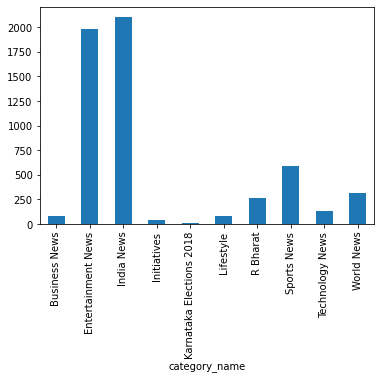

In [17]:
hf.plot.bar(data.groupby('category_name').category_name.count())

In [0]:
ARTICLES_READ=[ 1,10]
NUM_RECOMMENDED_ARTICLES=3

In [19]:
articles = data['story_text'].tolist()
articles[0]

'Hack:\xa0\\tThe 34-year-old actor is not sure if he\'s going to watch the upcoming \'Star Wars\' movie.\\tThe \'Silence\' star has appeared to hint that he doesn\'t like tuning into his own movies.\\tThe eighth installment, \'The Last Jedi\', in the epic sci-fi franchise \'Star Wars\' will hit theatres on December 15.\xa0Looks like Hollywood actor Adam Driver is still unsure about watching his own movies.The 34-year-old actor is not sure if he\'s going to watch the upcoming \'Star Wars\' movie in which he reprises his role as Kylo Ren, as he finds it \'\'self-destructive\'\' after a while, reports People Magazine."I can\'t just watch it objectively."In an interview with a leading U.S. magazine, when asked if he is going to watch his upcoming movie \'The Last Jedi\', he said, "Undecided. I always hate it and then come back to, like, \'Okay, that\'s fine, it\'s not about me. It\'s the story.\' I can\'t watch it once. I have to watch it five times, you know? The movie is over."Adding, "I

In [0]:
def clean_text(document):
    document = re.sub('[^\w_\s-]', ' ',document)       #remove punctuation marks and other symbols
    tokens = nltk.word_tokenize(document)              #Tokenize sentences
    cleaned_article = ' '.join([stemmer.stem(item) for item in tokens])    #Stemming each token
    return cleaned_article

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stemmer')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading stemmer: Package 'stemmer' not found in
[nltk_data]     index


False

In [0]:
import re
from nltk.stem.snowball import SnowballStemmer
import nltk
stemmer=SnowballStemmer("english")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
cleaned_articles = list(map(clean_text, articles))
cleaned_articles[0]  #a cleaned, tokenized and stemmed article

'hack tthe 34-year-old actor is not sure if he s go to watch the upcom star war movi tthe silenc star has appear to hint that he doesn t like tune into his own movi tthe eighth instal the last jedi in the epic sci-fi franchis star war will hit theatr on decemb 15 look like hollywood actor adam driver is still unsur about watch his own movi the 34-year-old actor is not sure if he s go to watch the upcom star war movi in which he repris his role as kylo ren as he find it self-destruct after a while report peopl magazin i can t just watch it object in an interview with a lead u s magazin when ask if he is go to watch his upcom movi the last jedi he said undecid i alway hate it and then come back to like okay that s fine it s not about me it s the stori i can t watch it onc i have to watch it five time you know the movi is over ad it s on film so it s perman but if i think about it more it s just an obsess loop i keep play in my mind that i can t get caught up in becaus it s total self-des

In [24]:
user_articles = ' '.join(cleaned_articles[i] for i in ARTICLES_READ)
user_articles

'the latest poster of 2 0 featur bollywood superstar akshay kumar will sure give you goosebump the poster give us a closer look at the actor s menac avatar akshay who has never don an evil charact like this can be seen give intens express that will definit make fan even more excit the latest poster of the film was share by note south trade analyst ramesh bala on twitter 2point0audiolaunch poster - akshaykumar pic twitter com rp9zdqwmte ramesh bala rameshlaus novemb 1 2017the toilet ek prem katha star will be seen play the antagonist richard in 2 0 which is a sequel to the mega hit enthiran also star superstar rajinikanth and ami jackson the film is schedul for a releas on januari 25 bollywood actress nargi fakhri who is current in the state has report found new love in the american director matt alonzo she post a coupl of pictur on her instagram account which might have led to the rise of such specul happi birthday mattalonzo rollercoastera post share by nargi fakhri nargisfakhri on ap

In [25]:
#Generate tfidf matrix model for entire corpus
tfidf_matrix = TfidfVectorizer(stop_words='english', min_df=2) 
# min_df : When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold
article_tfidf_matrix = tfidf_matrix.fit_transform(cleaned_articles)
article_tfidf_matrix #tfidf vector of an article

<5585x20653 sparse matrix of type '<class 'numpy.float64'>'
	with 590394 stored elements in Compressed Sparse Row format>

In [26]:
#Generate tfidf matrix model for read articles
user_article_tfidf_vector = tfidf_matrix.transform([user_articles])
user_article_tfidf_vector

<1x20653 sparse matrix of type '<class 'numpy.float64'>'
	with 131 stored elements in Compressed Sparse Row format>

In [27]:
user_article_tfidf_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [0]:
articles_similarity_score=cosine_similarity(article_tfidf_matrix, user_article_tfidf_vector)

In [0]:
recommended_articles_id = articles_similarity_score.flatten().argsort()[::-1]

In [30]:
recommended_articles_id

array([  10,    1, 3345, ..., 1933, 4850, 2341])

In [0]:
#Remove read articles from recommendations
final_recommended_articles_id = [article_id for article_id in recommended_articles_id 
                                 if article_id not in ARTICLES_READ ][:NUM_RECOMMENDED_ARTICLES]

In [32]:
final_recommended_articles_id

[3345, 1002, 4867]

In [33]:
#Recommended Articles and their title
print ('Articles Read')
print (data.loc[ARTICLES_READ]['title'])
print ('\n')
print ('Recommendations ')
print (data.loc[final_recommended_articles_id]['title'])

Articles Read
1     BEWARE: Akshay Kumar's look from 2.0 is out, a...
10    Nargis Fakhri’s Pic With Alleged Boyfriend Goe...
Name: title, dtype: object


Recommendations 
3345    Nargis Fakhri amps up the heat with a sensatio...
1002    Throwback blowback: Nargis Fakhri trolled for ...
4867    Rajinikanth, Akshay Kumar reveal their fiery s...
Name: title, dtype: object
